The aim of this notebook is to explore the coursea_data.csv dataset and find any relationships/insights of interest.

#Preliminary Steps

In [ ]:
#Import appropriate modules.
! pip install Plotly
! pip install cufflinks
! pip install chart-studio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
#Load data. Expicitly state the the first column is the index column. So that we
#don't end up with two index columns.
df = pd.read_csv("/content/coursea_data.csv", index_col=0)

#Data Cleaning

In [ ]:
#See shape of data
df.shape

(891, 6)

In [ ]:
#See form of data
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [ ]:
#Get some basic info about the df.
#None of the columns have missing values.
#All the columns are strings except rating which is float.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


In [ ]:
#Turn the number of students enrolled from a string to a number.

def value_to_float(x):
  if 'k' in x:
      return float(x.replace('k', '')) * 1000
  if 'm' in x:
      return float(x.replace('m', '')) * 1000000

df['course_students_enrolled'] = df['course_students_enrolled'].apply(value_to_float)

In [ ]:
#Check if there are any duplicate rows.
df.duplicated().any()

False

In [ ]:
#Check that all course titles are unique.
df['course_title'].value_counts()

,count
course_title,
Developing Your Musicianship,2
Marketing Digital,2
Machine Learning,2
(ISC)² Systems Security Certified Practitioner (SSCP),1
Medical Neuroscience,1
...,...
Fashion as Design,1
Feminism and Social Justice,1
FinTech Law and Policy,1


This has shown that there are three instances of a course title being used twice.
These rows should be investigated to understand why.

This output has also shown that not all entries are necessarily in english.

In [ ]:
#Return all rows with the duplicated course titles.
df[df["course_title"].isin(["Developing Your Musicianship", "Marketing Digital", "Machine Learning"])]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
756,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41k
205,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54k
181,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290k
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m
241,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81k
325,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39k


There are two "Developing Your Musicianship" courses, both from Berklee College of Music. However one is a course and one is a specialisation, and they have different difficulty ratings and numbers of enrolled students so are likely not duplicates.

There are two "Machine Learning" courses, but they are from completely different organisations so clearly not duplicates.

Same for the two "Marketing Digital" courses.

In [ ]:
#Return a row with a non-english course title.
df[df["course_title"] == "Финансовые инструменты для частного инвестора"]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
163,Финансовые инструменты для частного инвестора,National Research University Higher School of ...,SPECIALIZATION,4.7,Beginner,38k


The non-english course title still has english for all the other columns. Therefore, I do not think there is a need to translate the entire df to english as the course title is just a name. The columns like difficulty are still in english so can be used for aggregations with the other data.

#EDA

###Course Ratings

In [ ]:
#Get some summary statistics for the course ratings.
df.describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


We can see immediately that the course ratings are quite consistent.

The lowest rating is 3.3 which is still not a bad score.

A visualistation will give us a better understanding though.

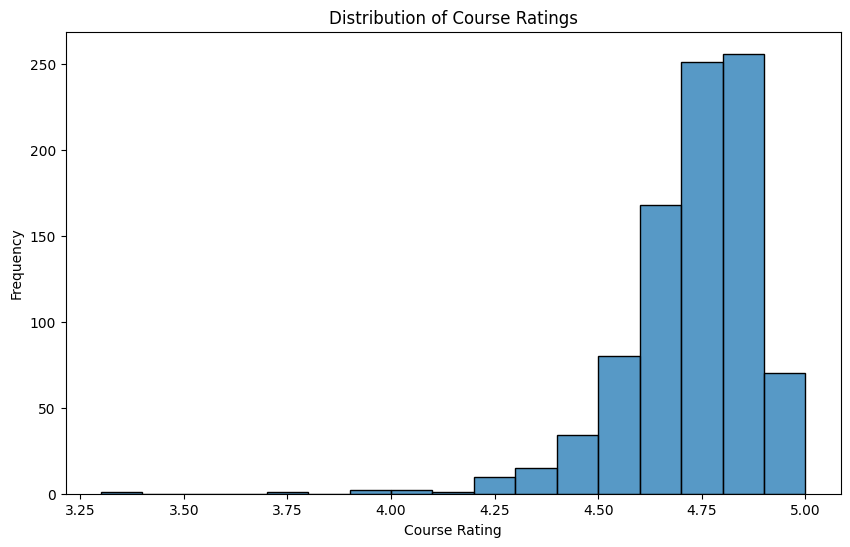

In [ ]:
#Plot histogram of course ratings.
#Calculate optimal number of bins.
max = 5.0
min = 3.3
granularity = 0.1
optimal_bins = int((max-min)/granularity)

plt.figure(figsize=(10, 6))
sns.histplot(df['course_rating'], bins=optimal_bins)
plt.title('Distribution of Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Frequency')
plt.show()

We can observe a skewed normal distribution with a fairly low spread. Most ratings are in the high 4s with a few lower outliers.

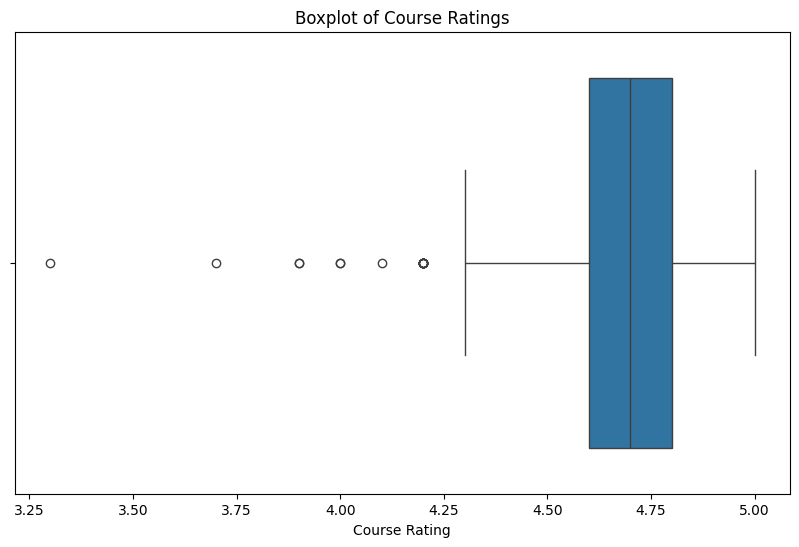

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['course_rating'])
plt.title('Boxplot of Course Ratings')
plt.xlabel('Course Rating')
plt.show()

Since the data does not have a lot of spread, we can see that the IQR shown in the box plot is very narrow. 50% of the ratings fall within this small range.

In [ ]:
#Return the outlier courses.
df[df["course_rating"] < 4.3]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
888,Aprende a programar con Python,Universidad Austral,SPECIALIZATION,4.2,Beginner,6.6k
821,Cybersecurity and Its Ten Domains,University System of Georgia,COURSE,4.2,Beginner,140k
569,Foundations of Marketing Analytics,Emory University,SPECIALIZATION,4.2,Intermediate,27k
803,Hardware Description Languages for FPGA Design,University of Colorado Boulder,COURSE,4.2,Intermediate,7.4k
767,How To Create a Website in a Weekend! (Project...,The State University of New York,COURSE,3.3,Mixed,140k
609,How to Start Your Own Business,Michigan State University,SPECIALIZATION,4.1,Beginner,34k
345,Instructional Design Foundations and Applications,University of Illinois at Urbana-Champaign,COURSE,4.2,Mixed,12k
339,Introduction to Spreadsheets and Models,University of Pennsylvania,COURSE,4.2,Mixed,76k
659,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,COURSE,4.0,Intermediate,13k
352,Machine Learning and Reinforcement Learning in...,New York University,SPECIALIZATION,3.7,Intermediate,29k


The lowest rated course is "How To Create a Website in a Weekend! (Project-Centered Course)" by The State University of New York.


Do the other columns affect the rating?

In [ ]:
#Group by organization and average course_rating.
organization_rating_df = df.groupby("course_organization")["course_rating"].mean().sort_values(ascending=False).reset_index()
organization_rating_df

,course_organization,course_rating
0,Hebrew University of Jerusalem,4.900
1,"Nanyang Technological University, Singapore",4.900
2,Universidade Estadual de Campinas,4.900
3,Crece con Google,4.900
4,London Business School,4.900
...,...,...
149,Luther College at the University of Regina,4.400
150,Unity,4.350
151,New York Institute of Finance,4.300
152,Tsinghua University,4.300


There are 154 distinct organizations. So show top 10 and bottom 10.

In [ ]:
#The top 10 organizations
organization_rating_df.head(10)

,course_organization,course_rating
0,Hebrew University of Jerusalem,4.900000
1,"Nanyang Technological University, Singapore",4.900000
2,Universidade Estadual de Campinas,4.900000
3,Crece con Google,4.900000
4,London Business School,4.900000
5,Google - Spectrum Sharing,4.900000
6,ScrumTrek,4.900000
7,Universidade de São Paulo,4.866667
8,The University of Chicago,4.850000
9,Universidad de los Andes,4.820000


In [ ]:
#The bottom 10 organizations
organization_rating_df.tail(10)

,course_organization,course_rating
144,Peter the Great St. Petersburg Polytechnic Uni...,4.400
145,American Institute of Business and Economics,4.400
146,Icahn School of Medicine at Mount Sinai,4.400
147,Novosibirsk State University,4.400
148,The Linux Foundation,4.400
149,Luther College at the University of Regina,4.400
150,Unity,4.350
151,New York Institute of Finance,4.300
152,Tsinghua University,4.300
153,The State University of New York,4.275


In [ ]:
#Group by certification and average course_rating.
certification_rating_df = df.groupby("course_Certificate_type")["course_rating"].mean().sort_values(ascending=False).reset_index()
certification_rating_df

,course_Certificate_type,course_rating
0,COURSE,4.707045
1,PROFESSIONAL CERTIFICATE,4.700000
2,SPECIALIZATION,4.618182


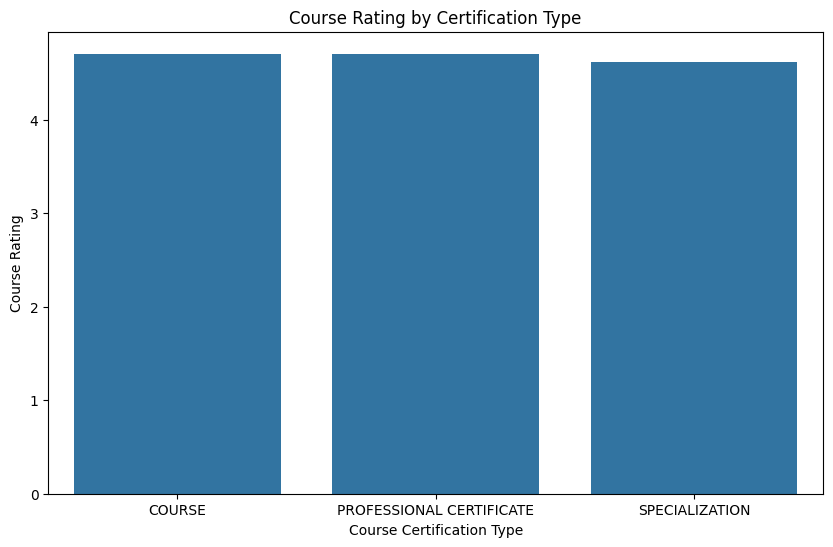

In [ ]:
#Plot rating by certification type.

plt.figure(figsize=(10, 6))
sns.barplot(x="course_Certificate_type", y="course_rating", data=certification_rating_df)
plt.title('Course Rating by Certification Type')
plt.xlabel('Course Certification Type')
plt.ylabel('Course Rating')
plt.show()

It can be seen that the certification type does not have a large impact on the course rating. Specialisations have a slightly lower average rating.

In [ ]:
#Group by difficulty and average course_rating.
difficulty_rating_df = df.groupby("course_difficulty")["course_rating"].mean().sort_values(ascending=False).reset_index()
difficulty_rating_df

,course_difficulty,course_rating
0,Mixed,4.708556
1,Beginner,4.680903
2,Intermediate,4.646465
3,Advanced,4.600000


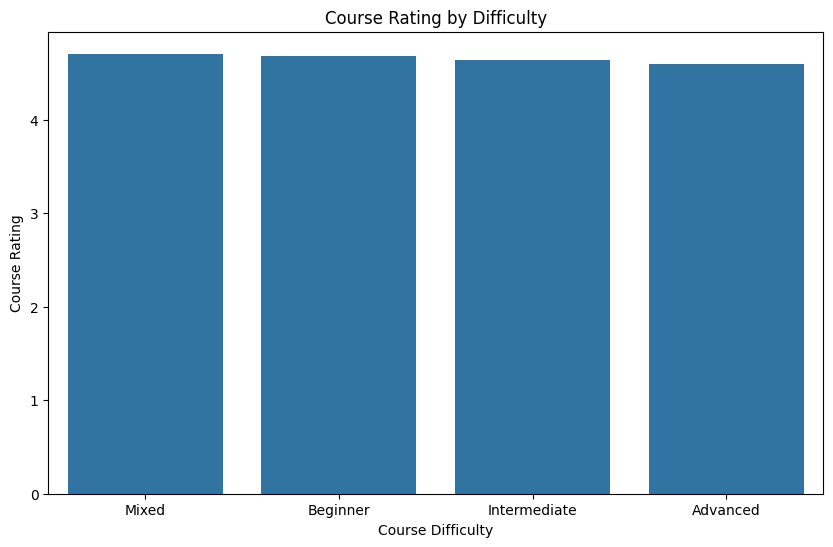

In [ ]:
#Plot rating by course difficulty.

plt.figure(figsize=(10, 6))
sns.barplot(x="course_difficulty", y="course_rating", data=difficulty_rating_df)
plt.title('Course Rating by Difficulty')
plt.xlabel('Course Difficulty')
plt.ylabel('Course Rating')
plt.show()

The harder a course, the lower people rate it. This shows the bias that is always present in subjective ratings.

Despite this, difficulty still has only a small impact on course rating.

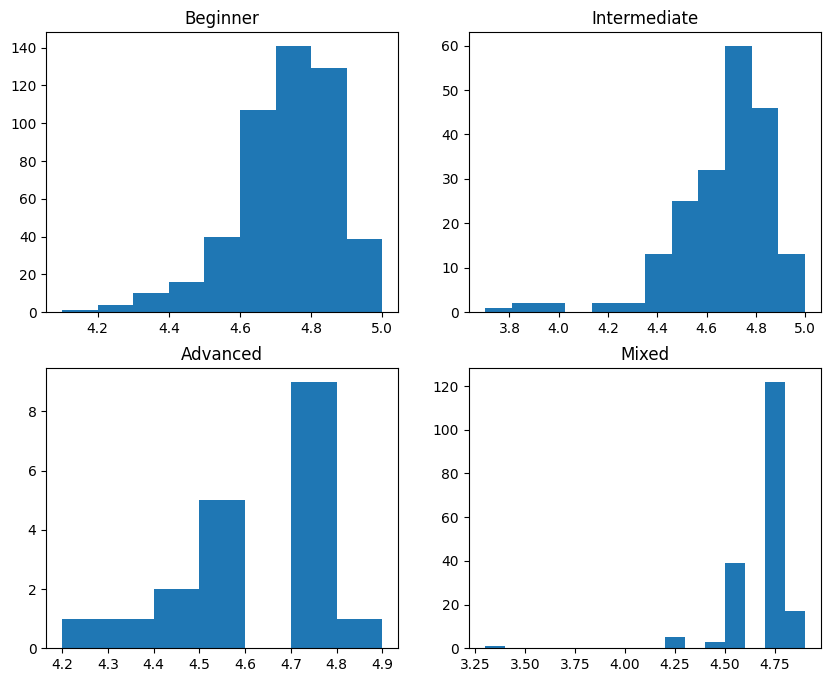

In [ ]:
#Plot the distribution of ratings within each difficulty.
fig, axes = plt.subplots(2, 2, figsize=(10,8))

df1 = df[df["course_difficulty"] == "Beginner"]
df2 = df[df["course_difficulty"] == "Intermediate"]
df3 = df[df["course_difficulty"] == "Advanced"]
df4 = df[df["course_difficulty"] == "Mixed"]

axes[0,0].hist(df1["course_rating"], bins=int((df1["course_rating"].max() - df1["course_rating"].min())/granularity))
axes[0,1].hist(df2["course_rating"], bins=int((df2["course_rating"].max() - df2["course_rating"].min())/granularity))
axes[1,0].hist(df3["course_rating"], bins=int((df3["course_rating"].max() - df3["course_rating"].min())/granularity))
axes[1,1].hist(df4["course_rating"], bins=int((df4["course_rating"].max() - df4["course_rating"].min())/granularity))

axes[0,0].title.set_text('Beginner')
axes[0,1].title.set_text('Intermediate')
axes[1,0].title.set_text('Advanced')
axes[1,1].title.set_text('Mixed')

All the different difficulties have a similar overall shape of a skewed normal distribution. However the mixed difficulty conforms with this shape the least and also has the lowest outlier.

In [ ]:
#Group by rating and sum enrollment.
rating_enrolled_df = df.groupby("course_rating")["course_students_enrolled"].sum().sort_values(ascending=False).reset_index()
rating_enrolled_df

,course_rating,course_students_enrolled
0,4.8,22335600.0
1,4.7,20574900.0
2,4.6,15783200.0
3,4.9,11639300.0
4,4.5,5962000.0
5,4.4,2782600.0
6,4.2,637200.0
7,4.3,624000.0
8,3.3,140000.0
9,3.9,91000.0


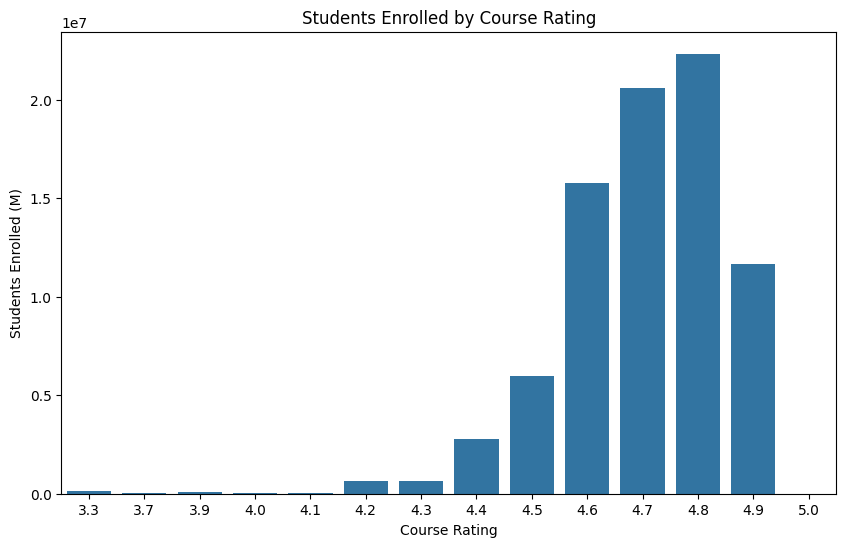

In [ ]:
#Plot enrollment by rating.

plt.figure(figsize=(10, 6))
sns.barplot(x="course_rating", y="course_students_enrolled", data=rating_enrolled_df)
plt.title('Students Enrolled by Course Rating')
plt.xlabel('Course Rating')
plt.ylabel('Students Enrolled')
plt.show()

This distribution is very similar to the first plotted histogram of course rating.

In [ ]:
correlation_features = df[["course_rating","course_students_enrolled"]]
correlation_features.corr()

,course_rating,course_students_enrolled
course_rating,1.00000,0.07109
course_students_enrolled,0.07109,1.00000


There does not seem to be a correlation between course rating and enrollment.

<Axes: xlabel='course_rating', ylabel='course_students_enrolled'>

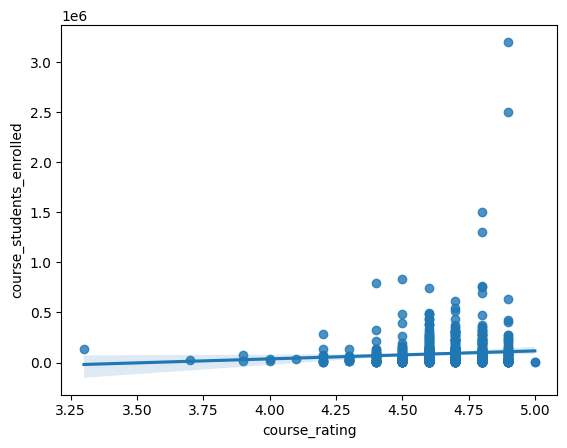

In [ ]:
#We can further explore this with a scatterplot.
sns.regplot(x="course_rating", y="course_students_enrolled", data=df)

###Enrollment

In [ ]:
#Top 10 courses by enrollment.
df.sort_values("course_students_enrolled", ascending=False).head(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000.0
13,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000.0
...,...,...,...,...,...,...
826,The Pronunciation of American English,"University of California, Irvine",SPECIALIZATION,4.6,Beginner,1700.0
856,"Identifying, Monitoring, and Analyzing Risk an...",(ISC)²,COURSE,4.9,Beginner,1700.0
462,Blockchain Revolution in Financial Services,INSEAD,SPECIALIZATION,4.6,Beginner,1600.0
401,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1600.0


In [ ]:
#Bottom 10 courses by enrollment.
df.sort_values("course_students_enrolled", ascending=False).tail(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
447,International Security Management,Erasmus University Rotterdam,COURSE,4.5,Beginner,2200.0
640,Implementing RPA with Cognitive Automation and...,Automation Anywhere,SPECIALIZATION,4.6,Beginner,2200.0
751,Blended Language Learning: Design and Practice...,University of Colorado Boulder,COURSE,4.8,Intermediate,1900.0
693,Esports,"University of California, Irvine",SPECIALIZATION,4.5,Beginner,1800.0
373,Healthcare Law,University of Pennsylvania,SPECIALIZATION,4.7,Intermediate,1700.0
826,The Pronunciation of American English,"University of California, Irvine",SPECIALIZATION,4.6,Beginner,1700.0
856,"Identifying, Monitoring, and Analyzing Risk an...",(ISC)²,COURSE,4.9,Beginner,1700.0
462,Blockchain Revolution in Financial Services,INSEAD,SPECIALIZATION,4.6,Beginner,1600.0
401,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1600.0
789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1500.0


In [ ]:
#Group by organization and sum enrollment.
organization_enrollment_df = df.groupby("course_organization")["course_students_enrolled"].sum().sort_values(ascending=False).reset_index()
organization_enrollment_df

,course_organization,course_students_enrolled
0,University of Michigan,7437700.0
1,University of Pennsylvania,5501300.0
2,Stanford University,4854000.0
3,"University of California, Irvine",4326000.0
4,Johns Hopkins University,4298900.0
...,...,...
149,UCL School of Management,7800.0
150,ESCP Business School,6500.0
151,University of New Mexico,5500.0
152,Peter the Great St. Petersburg Polytechnic Uni...,2400.0


In [ ]:
#Top 10 organizations by enrollment.
organization_enrollment_df.head(10)

,course_organization,course_students_enrolled
0,University of Michigan,7437700.0
1,University of Pennsylvania,5501300.0
2,Stanford University,4854000.0
3,"University of California, Irvine",4326000.0
4,Johns Hopkins University,4298900.0
5,Duke University,3967600.0
6,Yale University,3952000.0
7,IBM,2956400.0
8,deeplearning.ai,2863400.0
9,Google Cloud,2604300.0


In [ ]:
#Bottom 10 organizations by enrollment.
organization_enrollment_df.tail(10)

,course_organization,course_students_enrolled
144,The University of Hong Kong,9500.0
145,Fundação Instituto de Administração,9200.0
146,Palo Alto Networks,9100.0
147,Crece con Google,8800.0
148,Novosibirsk State University,8200.0
149,UCL School of Management,7800.0
150,ESCP Business School,6500.0
151,University of New Mexico,5500.0
152,Peter the Great St. Petersburg Polytechnic Uni...,2400.0
153,Automation Anywhere,2200.0


In [ ]:
certification_enrollment_df = df.groupby("course_Certificate_type")["course_students_enrolled"].sum().sort_values(ascending=False).reset_index()
certification_enrollment_df

,course_Certificate_type,course_students_enrolled
0,COURSE,51131300.0
1,SPECIALIZATION,27262200.0
2,PROFESSIONAL CERTIFICATE,2288400.0


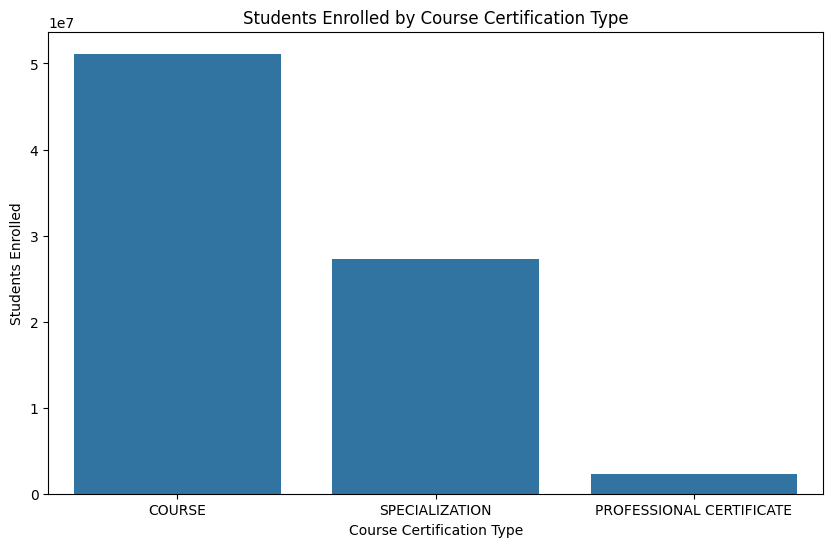

In [ ]:
#Plot enrollment by certification.

plt.figure(figsize=(10, 6))
sns.barplot(x="course_Certificate_type", y="course_students_enrolled", data=certification_enrollment_df)
plt.title('Students Enrolled by Course Certification Type')
plt.xlabel('Course Certification Type')
plt.ylabel('Students Enrolled')
plt.show()

In [ ]:
difficulty_enrollment_df = df.groupby("course_difficulty")["course_students_enrolled"].sum().sort_values(ascending=False).reset_index()
difficulty_enrollment_df

,course_difficulty,course_students_enrolled
0,Beginner,39921800.0
1,Mixed,24989400.0
2,Intermediate,14506300.0
3,Advanced,1264400.0


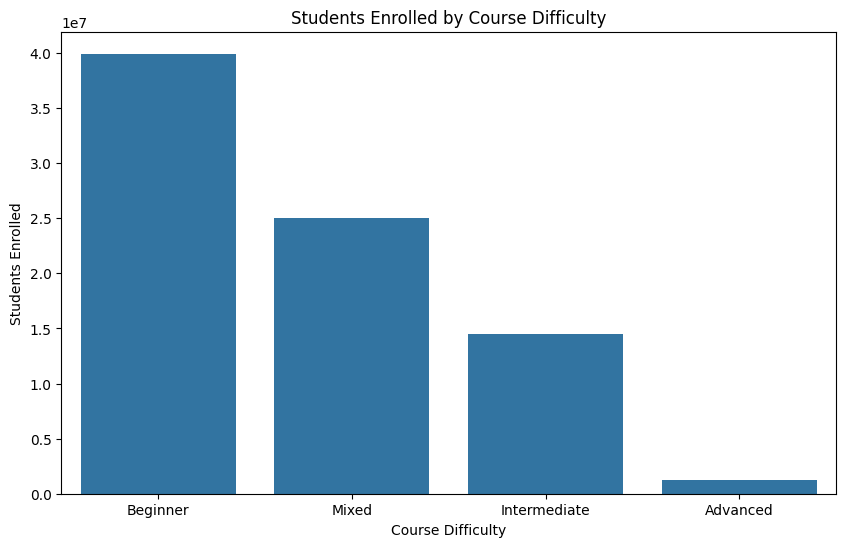

In [ ]:
#Plot enrollment by difficulty.

plt.figure(figsize=(10, 6))
sns.barplot(x="course_difficulty", y="course_students_enrolled", data=difficulty_enrollment_df)
plt.title('Students Enrolled by Course Difficulty')
plt.xlabel('Course Difficulty')
plt.ylabel('Students Enrolled')
plt.show()

###Difficulty

In [ ]:
#Group difficulty by count
difficulty_count_df = df["course_difficulty"].value_counts()
difficulty_count_df

,count
course_difficulty,
Beginner,487
Intermediate,198
Mixed,187
Advanced,19


Above we saw that there is less enrollment in advanced courses and more in beginner. However, now we see that this may be due to the simple fact that less advanced courses are offered.

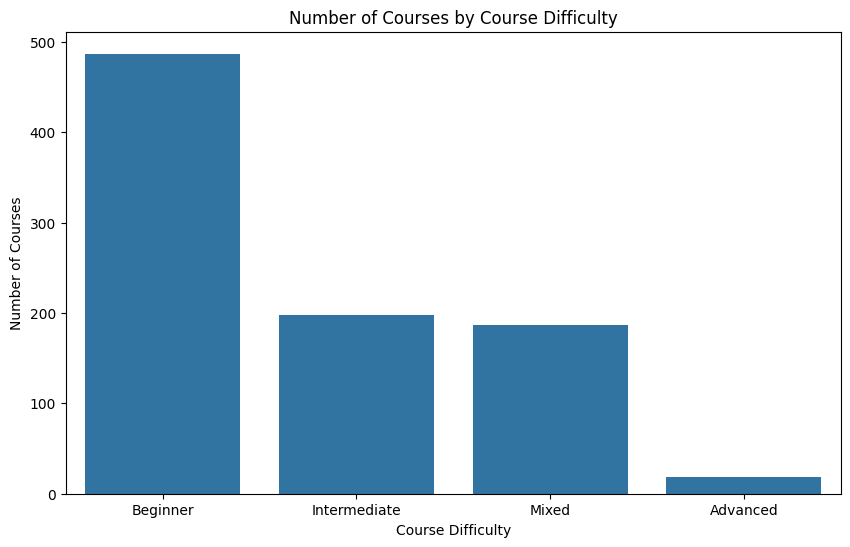

In [ ]:
#Plot course count by difficulty.

plt.figure(figsize=(10, 6))
sns.barplot(difficulty_count_df)
plt.title('Number of Courses by Course Difficulty')
plt.xlabel('Course Difficulty')
plt.ylabel('Number of Courses')
plt.show()

###Certification Type

In [ ]:
#Group certification by count
certification_count_df = df["course_Certificate_type"].value_counts()
certification_count_df

,count
course_Certificate_type,
COURSE,582
SPECIALIZATION,297
PROFESSIONAL CERTIFICATE,12


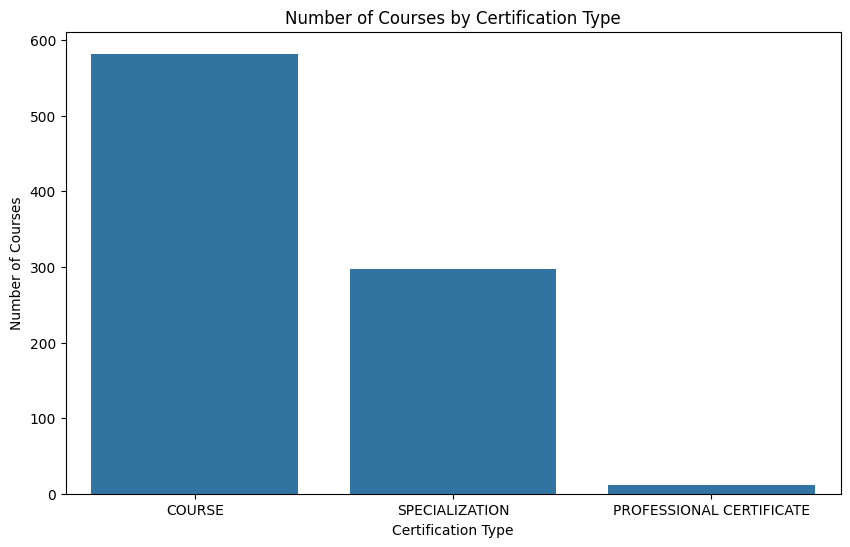

In [ ]:
#Plot course count by certification.

plt.figure(figsize=(10, 6))
sns.barplot(certification_count_df)
plt.title('Number of Courses by Certification Type')
plt.xlabel('Certification Type')
plt.ylabel('Number of Courses')
plt.show()

Above we saw that there is less enrollment in professional certificates and more in courses. However, now we see that this may be due to the simple fact that less proffesional certificates are offered.